In [1]:
### GTA
%matplotlib inline
import random
import numpy.random as npr
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

Premiere version non fonctionnelle

In [2]:
#print(expovariate(3))
#print(npr.exponential(B,6)) B = 1 / lambda

def R_capital(cap, temps, rec,mu1, mu2,n):
    R = []
    T = npr.exponential(1/mu1,n) #Permet d'obtenir le delta entre 2 events
    X = npr.exponential(1/mu2,n) #represente les couts des sinistres
    for i in range(temps):
        R.append(cap+rec*i)
    last_t = 0
    indice = 0
    k = 0
    while( (indice<n) and (k<temps) ):
        if(T[indice] < k - last_t):
            R[k] = R[k] - X[indice]
            indice = indice + 1
            last_t = k
        #if(R[k] < 0):
            #return False
        k = k + 1
        

    x = np.linspace(0,temps,temps)
    y = R
    plt.plot(x,y)
    plt.show()
    for i in range(temps):
        if(R[i] < 0):
            return False
    return True
    #return(R)

vieille version utilisee pour faire la fonction 

In [3]:
def R_v3(cap, temps, rec, mu, lam):
    R = []
    R.append(cap)

    T = [] #Tableau des Ti
    X = [] #Tableau des Xi

    Abs = []
    Abs.append(0) #le temps commence a 0

    tmp = 0
    somme = 0
    indice = 0 #indice pour R[] qui augmente de 2, sinon on ne reutilise pas la bonne valeur de R[indice]
    i = 0 #indice pour T[] et X[]
    
    while( tmp < temps ) : # Tant que le temps maximal n'est pas depasse, on continue
        x = expovariate(mu)
        T.append(somme + x)  # expovariate(mu) donne une loi expo de param mu
        somme = somme + x    # On  garde en memoire la somme
        X.append(expovariate(lam))
        if((tmp > T[i] ) ): #T[indice + 1] > temps)
            R.append(R[indice] + rec*T[i])
            R.append(R[indice] + rec*T[i] - X[i])
            Abs.append(T[i]) # On construit l'abscice qui correspond a nos points que nous allons afficher
            Abs.append(T[i])
            indice = indice + 2
            i = i + 1
        tmp = tmp + 1
    
    Abs.append(T[i])
    R.append(R[indice] + rec*T[i])
    
    plt.plot(Abs,R)
    plt.show()

Version fonctionnelle. On observe bien 2 images pour le meme point lors d un sinistre.

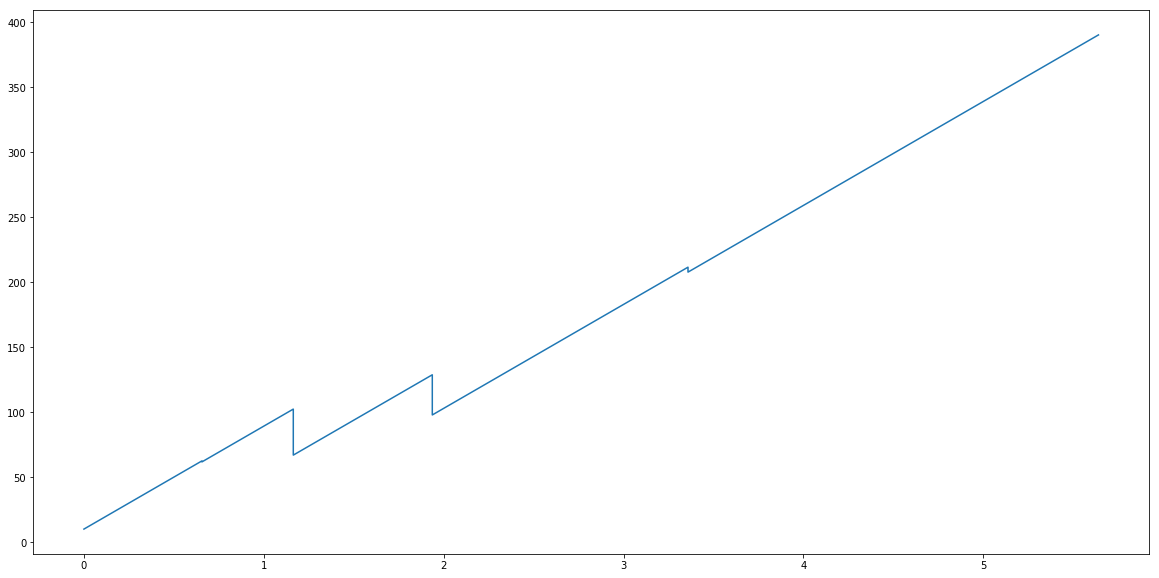

In [82]:
#cap = capital initial = c
#temps = temps de la simulation = t
#rec = recettes versees par les clients  = p
#mu = mu de la loi expo des sinistres
#n = nombre de sinistres

def R_v0(cap, temps, rec, mu, lam):
    R = []
    R.append(cap)

    T = [] #Tableau des Ti
    X = [] #Tableau des Xi

    Abs = []
    Abs.append(0) #le temps commence a 0
    T.append(0)
    X.append(0)
    
    somme = 0
    indice = 0
    i = 1
    t = npr.exponential(mu,1)
    T.append(somme + t)
    somme = somme + t
    
    

    while( T[i] < temps ) : # Tant que le temps maximal n'est pas depasse, on continue
        t = npr.exponential(mu,1)
        T.append(somme + t)  # expovariate(mu) donne une loi expo de param mu
        somme = somme + t    # On  garde en memoire la somme
        X.append(npr.exponential(lam,1))
        R.append(R[indice] + rec*(T[i]-T[i-1]))
        R.append(R[indice+1] - X[i])
        Abs.append(T[i]) # On construit l'abscice qui correspond a nos points que nous allons afficher
        Abs.append(T[i])
        
        i = i + 1
        indice = indice + 2
        
    Abs.append(T[i])
    R.append(R[indice] + rec*(T[i]-T[i-1]))

    plt.plot(Abs,R)
    plt.show()
    
    
R_v0(10,5,80,1,30)
#R_v0(10,5,80,1,1)

Cette fonction permet d'obtenir le capital au temps "temps". On commence par initialiser quatre tableaux.
R correspond au capital.
T correspond aux instants des sinistres.
X correspond aux couts des sinistres.
Abs est le tableaux des abscisses permettant de contruire le graphique. 

Tout d'abord, on initialise les tableaux. 
i est l'entier permettant d'accéder aux éléments des tableaux X et T. 
indice permet d'accéder aux éléments de R, à chaque tour de boucle, indice augmente de 2 unités car pour chaque sinistre, il y a deux valeurs du capital, et il faut repartir de la bonne.

La boucle while permet de similuer l'arrivée des sinistres. 
A chaque sinistre, on construit le point précédent la perte d'argent, puis, on retire le coup du sinistre au capital. On ajoute aussi à Abs, le moment où le sinistre a eu lieu pour pouvoir par la suite tracer le graphique. 

Quand on sort de la boucle, cela veut dire que le dernier sinistre a lieu après le temps paramétré. Ainsi, on ajoute cette fois-ci seulement la valeur du capital, sans enlever le coup du sinistre ( car il n'a pas encore eu lieu). 

Finalement, on trace le graphique représentant le capital en fonction du temps. 

In [78]:
#cap = capital initial = c
#temps = temps de la simulation = t
#rec = recettes versees par les clients  = p
#mu = mu de la loi expo des sinistres
#n = nombre de sinistres

def R_cap(cap, temps, rec, mu, lam):
    R = []
    R.append(cap)

    T = [] #Tableau des Ti
    X = [] #Tableau des Xi
    
    T.append(0)
    X.append(0)
    
    somme = 0
    indice = 0
    i = 1
    t = npr.exponential(mu,1)
    T.append(somme + t)
    somme = somme + t
    
    

    while( T[i] < temps ) : # Tant que le temps maximal n'est pas depasse, on continue
        #t = expovariate(mu)
        t = npr.exponential(mu,1)
        T.append(somme + t)  # expovariate(mu) donne une loi expo de param mu
        somme = somme + t    # On  garde en memoire la somme
        X.append(npr.exponential(lam))
        R.append(R[indice] + rec*(T[i]-T[i-1]))
        R.append(R[indice+1] - X[i])
        
        if(R[indice + 1] < 0 ):
            return (lam,-1)
            
        i = i + 1
        indice = indice + 2
    
    R.append(R[indice] + rec*(T[i]-T[i-1]))
    
    return(lam,1)
    
R_cap(10,5,80,1,30)

(1, 1)

In [48]:
def ruine(n,cap, temps, rec, mu,lam):
    Reu = [] #Tableau des reussites 
    Fail = [] #Tableau des ruines
    
    for i in range(n):
        x = R_cap(cap, temps, rec, mu,lam)
        if(x[1] == 1):
            Reu.append(x)
        else :
            Fail.append(x)
    
    return[len(Reu),len(Fail),mu,lam]


ruine(1000,10,5,80,1,100)

[393, 607, 1, 100]

_________________________________________________________________________________________________________________________

Cette fonction permet de visualiser le graphe du nombre de ruine en fonction de lambda. 
Fonction construite de telle sorte que l'on voit la converge de la probabilité de ruine lorsque lam * mu > rec

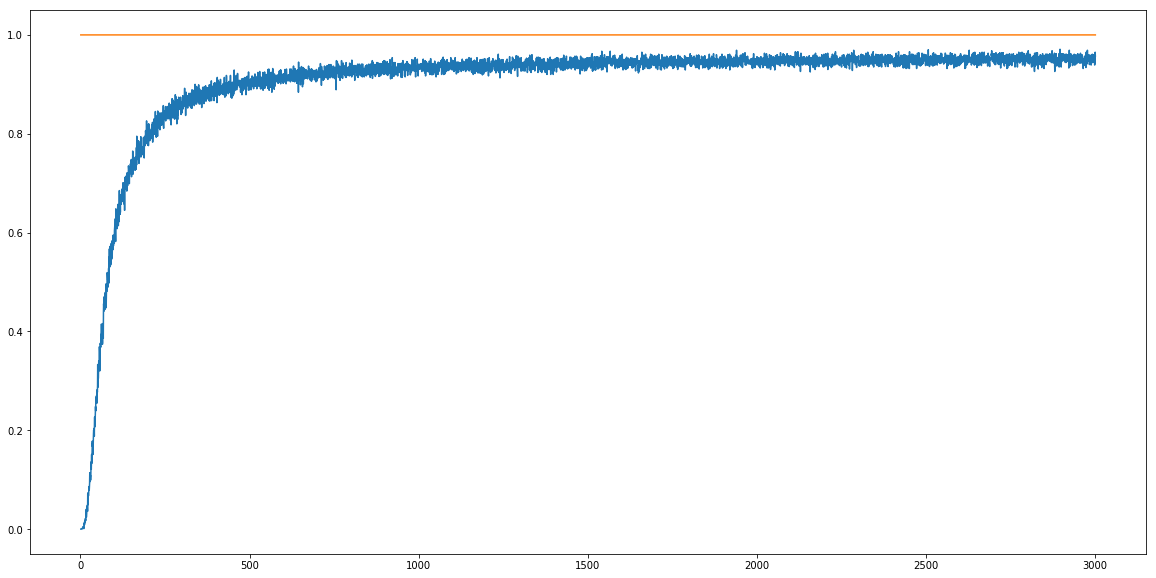

In [72]:
def graph_1(tours,n,cap, temps, rec, mu,lam, pas):

    list_ruine = [] #nombre de ruines # ordonnée
    lambd = [] #Abscisse les lam utilisés pour les simulations
    N = []
    
    X = ruine(n,cap,temps,rec,mu,lam)
    nb_ruine = X[1]/n
    lam = X[3]
    list_ruine.append(nb_ruine)
    lambd.append(lam)
    N.append(1)
    
    for i in range(tours):
        lam = lam + pas

        X = ruine(n,cap,temps,rec,mu,lam)
        nb_ruine = X[1]/n
        lam = X[3]
        
        list_ruine.append(nb_ruine)
        lambd.append(lam)
        N.append(1)
    
    
    plt.plot(lambd,list_ruine)
    plt.plot(lambd,N)
    plt.show()

graph_1(6000,1000,10,5,80,1,1,0.5)

_________________________________________________________________________________________________________________________

## Démarche 
fonction graphe 2 "=" m ruine
on fait m simulations avec les mêmes paramètres. 
permet de voir si il y a convergence ou non 
peut être plus intelligent que graphe 1  

Autre fonction 
appelle k grahpe 2 (= m ruine) 
on prend la valeur moyenne des m appels de graphe 2 
les paramètres lam et mu et change ici a chaque appel et on trace un graphe ressemblant à celui de graphe 1



_________________________________________________________________________________________________________________________

On appelle m fois la fonction ruine, sans changer les paramètres. 
On trace le graphique de la proba de ruine en fonction de m. 

On affiche 2 graphiques : 
 - p > lam * mu
 - p <= lam * mu

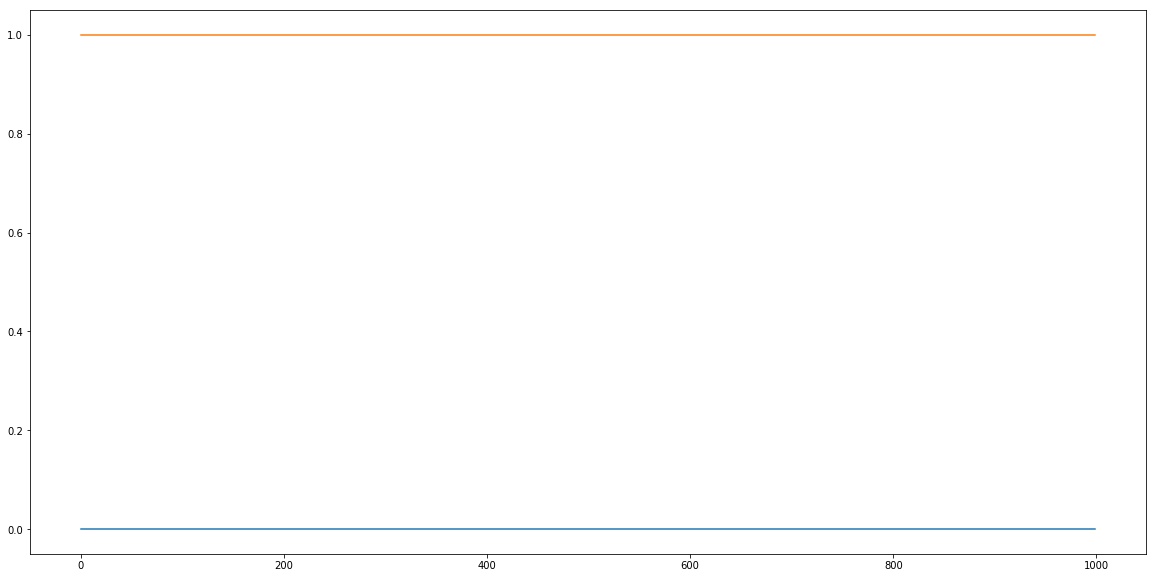

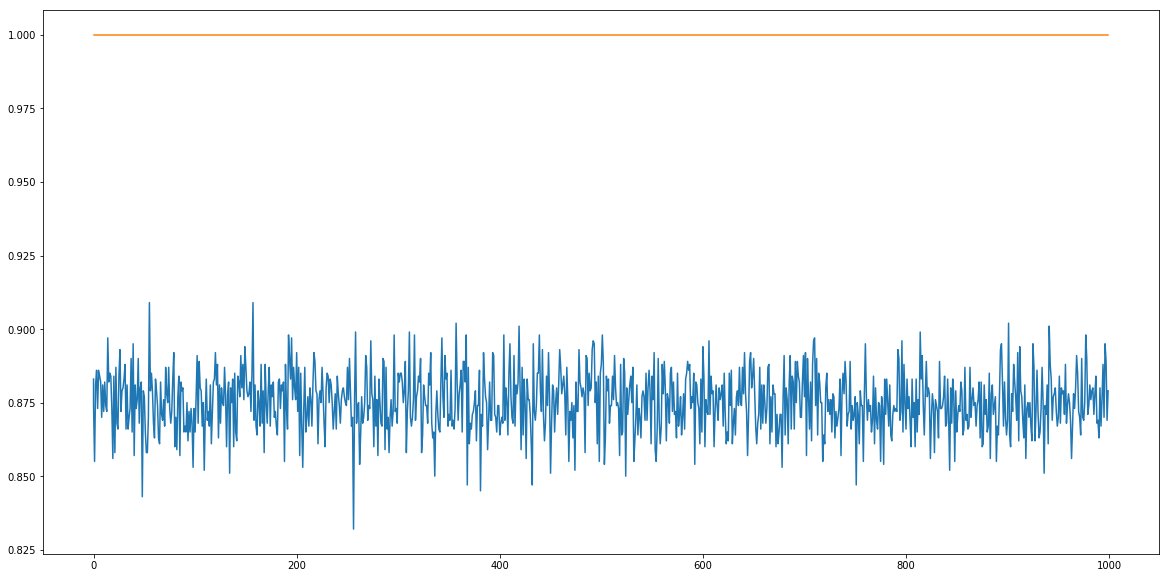

In [77]:
def graph_2(m,n,cap,temps,rec,mu,lam):
    
    list_ruine = [] #nombre de ruines # ordonnée
    Abs = [] #Abscisse le nombre de fois qu'on répette l'experience
    N = []
    
    X = ruine(n,cap,temps,rec,mu,lam)
    nb_ruine = X[1]/n
    list_ruine.append(nb_ruine)
    Abs.append(0)
    N.append(1)
    
    for i in range(m):
        X = ruine(n,cap,temps,rec,mu,lam)
        nb_ruine = X[1]/n
        
        list_ruine.append(nb_ruine)
        Abs.append(i)
        N.append(1)
    
    
    plt.plot(Abs,list_ruine)
    plt.plot(Abs,N)
    plt.show()

graph_2(1000,1000,10,5,80,1,10) # p > lam * mu
graph_2(1000,1000,10,5,80,1,350)  # p <= lam * mu

# peut être faire un histogramme pour montrer la valeur de la proba prise.

_________________________________________________________________________________________________________________________

k-ruine 
fonction qui appelle k fois la fonction m-ruine
A chaque fois avec des paramètres différents

_________________________________________________________________________________________________________________________

_________________________________________________________________________________________________________________________

Cette fonction a pour but de créer un graphique illustrant le nombre de ruines en fonction de lambda et de mu.

In [ ]:
def graph_3(n,cap, temps, rec, mu,lam, pas):
    list_ruine = []
    lambdmu = [] 

    N = []
    
    X = ruine(n,cap,temps,rec,mu,lam)
    nb_ruine = X[1]
    lam = X[3]

    list_ruine.append(nb_ruine)
    lambdmu.append(lam*mu)
    N.append(n)
    
    for i in range(10):
        lam = lam + pas
        mu = mu + pas
        X = ruine(n,cap,temps,rec,mu,lam)
        nb_ruine = X[1]
        lam = X[3]
        
        list_ruine.append(nb_ruine)
        lambdmu.append(lam*mu)
        N.append(n)
    
    
    plt.plot(lambdmu,list_ruine)
    #plt.plot(lambd,N)
    plt.show()
    

graph_3(1000,10,5,80,0,0,0.05)